In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("./input_data/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df["Sex"] = df["Sex"].astype("category").cat.codes

In [4]:
X = df.copy()
y = X.pop("Rings")

## train the model

In [5]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

out = {}
for i in range(1,50):
    model = RandomForestRegressor(n_estimators=i,random_state=1)
    out[i] = np.mean(cross_val_score(model, X, y, cv=kfold, scoring="r2"))
    

In [10]:
ans = None
for key,val in out.items():
    if np.round(val, 2) > 0.52:
        if not ans:
            ans = key


In [11]:
w = open("./week5/n_estimators.dat", "w")
w.write(f"{ans}")
w.close()

## saturation with growing forest

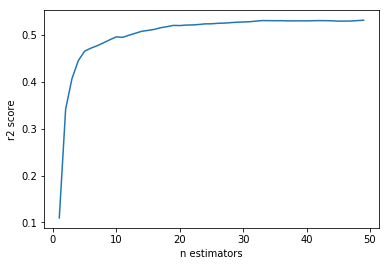

In [8]:
plt.plot(out.keys(), out.values())
plt.xlabel("n estimators")
plt.ylabel("r2 score")
plt.show();